# Mediciones no senoidales

In [ ]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

## Señal senoidal


In [ ]:
AMPLITUD = 10
OFFSET = 3
DUTY_CYCLE = 34 / 100
X_SCALE = np.linspace(0, 6*np.pi,4000,endpoint = False)#Endpoint = False -> muestreo todo menos la ultima muestra (se usa cuando concateno funciones periodicas)
                                                      #Si empieza y termina en 0, entonces tengo duplicado el cero en la concatenacion (ultimo punto duplicado)

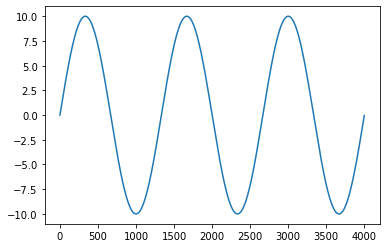

In [ ]:
I = AMPLITUD * np.sin(X_SCALE) + OFFSET

plt.plot(I)

In [ ]:
#I**2 Valor cuadratico de la señal

rmsAlgoritmo = np.sqrt((I**2).mean())

### Calculo del valor RMS

In [ ]:
#signal**2 Valor cuadratico de la señal
 
def rms(signal):
  return np.sqrt((signal**2).mean())

### Calculo del valor RMS - analogia multimetro

In [ ]:
#Calculo el valor medio de la señal (analogo al capacitor del tester)
def dcValue(signal):
  return signal.mean()

#Capacitor de acople
def acCoupling(signal):
  return signal - dcValue(signal)

#Efecto rectificador de la señal
def rectifier(signal):
  return np.abs(signal)

In [ ]:
def rmsMultimetroMe(signal):
  kme = np.pi / (np.sqrt(2)*2) #constante de calibracion - k alpha en la tabla
  signal = acCoupling(signal)
  signal = rectifier(signal)
  signal = dcValue(signal)
  signal = signal*kme
  return signal

def rmsMultimetroPico(signal):
  kpe = 1 / np.sqrt(2) #constante de calibracion - k alpha en la tabla
  signal = acCoupling(signal)
  signal = rectifier(signal)
  signal = signal.max()*kpe
  return signal

In [ ]:
def printSignals(signal):
  print('Amplitud = %0.2f \nOFFSET = %0.2f\n'%(AMPLITUD,OFFSET)) 
  print("RMS Multimetro (ME): ", rmsMultimetroMe(signal))
  print("RMS Multimetro (Pico): ", rmsMultimetroPico(signal))
  print("RMS Muestreado: ", rms(signal))
  print("RMS AC + RMS DC: ", np.sqrt(rmsMultimetroMe(signal)**2 + dcValue(signal)**2))


In [ ]:
printSignals(I)

Amplitud = 10.00 
OFFSET = 0.00

RMS Multimetro (ME):  7.071066357935375
RMS Multimetro (Pico):  7.071067811865475
RMS Muestreado:  7.0710678118654755
RMS AC + RMS DC:  7.071066357935375


## Señal cuadrada

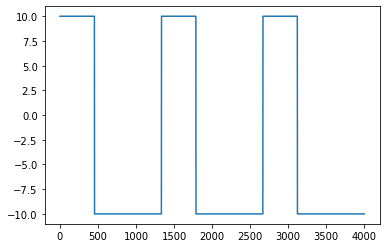

In [ ]:
s = AMPLITUD * signal.square(X_SCALE, DUTY_CYCLE) + OFFSET

plt.plot(s)

In [ ]:
printSignals(s)
#REVISAR!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
factorDeCorreccionMe_e = np.sqrt(2)/(np.pi * (np.sqrt(DUTY_CYCLE * (1 - DUTY_CYCLE))))
print('\nFactor de correccion Me : ',factorDeCorreccionMe_e)

print(rmsMultimetroMe(s)*factorDeCorreccionMe_e)

Amplitud = 10.00 
OFFSET = 0.00

RMS Multimetro (ME):  9.96982931322737
RMS Multimetro (Pico):  9.333809511662427
RMS Muestreado:  10.0
RMS AC + RMS DC:  10.4707925456905

Factor de correccion Me :  0.9502846165372
9.474175425861608


## Señal triangular

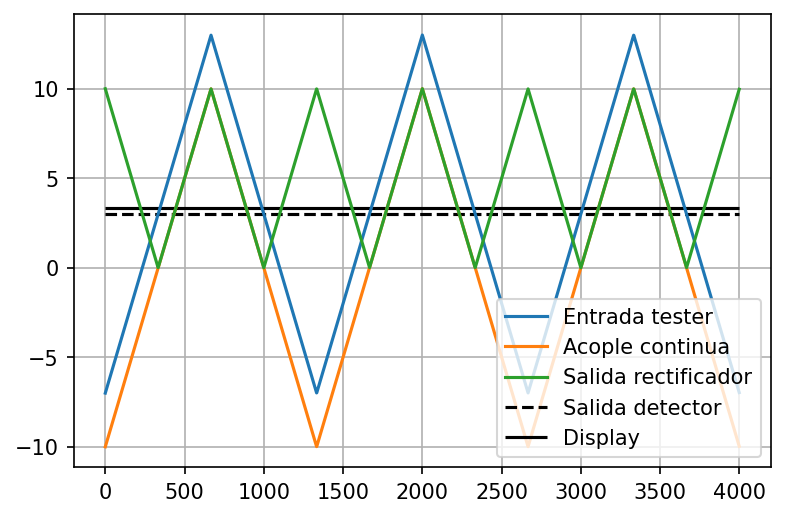

In [ ]:
sTriang = AMPLITUD * signal.sawtooth(X_SCALE,0.5) + OFFSET

plt.figure(dpi = 150)
plt.plot(sTriang, label = "Entrada tester") 
plt.plot(sTriang - dcValue(sTriang), label = "Acople continua") #Señal original sin el offset
plt.plot(rectifier(sTriang - dcValue(sTriang)), label = "Salida rectificador") #señal rectificada
plt.hlines(dcValue(sTriang), 0 , sTriang.shape[0], label = "Salida detector", linestyles = 'dashed')
plt.hlines(dcValue(sTriang)*1.11, 0, sTriang.shape[0], label = "Display")
plt.legend()

plt.grid()

In [ ]:
5 * 1.11

5.550000000000001

In [ ]:
printSignals(s)

Amplitud = 10.00 
OFFSET = 0.00

RMS Multimetro (ME):  9.96982931322737
RMS Multimetro (Pico):  9.333809511662427
RMS Muestreado:  10.0
RMS AC + RMS DC:  10.4707925456905


## Señal AM